# Programming Assignment 1
#### Drew Rosales

## 1. Data Analysis

In [105]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import seaborn as sns
import matplotlib.pyplot as plt

First, let's look the dataset into a pandas dataframe and view the contents

In [106]:
iris_df = pd.read_csv("iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### a) Perform test statistics for each feature and class: minimum, maximum, mean, trimmed mean, alpha trimmed mean, standard deviation, skewness, and kurtosis

In [107]:
def create_test_statistics(x, p, alpha):
    n = len(x)
    x = list(sorted(x))
    minimum = np.min(x)
    maximum = np.max(x)
    mu = np.mean(x, axis=0) # column-wise mean
    mu_trim = np.mean(x[p:-p], axis=0)
    mu_alpha = np.mean(x[int(np.floor(n*alpha)) :-int(np.floor(n*alpha))], axis=0) 
    sigma = np.std(x, axis=0)
    skewness = skew(x, axis=0)
    kurt = kurtosis(x, axis=0)
    return (minimum, maximum, mu, mu_trim, mu_alpha, sigma, skewness, kurt)
    

Separate per class into `setosa`, `virginica` and `versicolor` for each of the features

In [108]:
iris_table = [[iris_df[feature].loc[iris_df["species"] == class_name] for class_name in ["setosa", "versicolor", "virginica"]] for feature in ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
iris_table[3][2]

100    2.5
101    1.9
102    2.1
103    1.8
104    2.2
105    2.1
106    1.7
107    1.8
108    1.8
109    2.5
110    2.0
111    1.9
112    2.1
113    2.0
114    2.4
115    2.3
116    1.8
117    2.2
118    2.3
119    1.5
120    2.3
121    2.0
122    2.0
123    1.8
124    2.1
125    1.8
126    1.8
127    1.8
128    2.1
129    1.6
130    1.9
131    2.0
132    2.2
133    1.5
134    1.4
135    2.3
136    2.4
137    1.8
138    1.8
139    2.1
140    2.4
141    2.3
142    1.9
143    2.3
144    2.5
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, dtype: float64

`iris_table` is indexed first by `feature` such as `sepal_length`, it is then indexed by `class` like `setosa`. Above we see, `iris_table[3][2]` this notates `petal_width` for the `virginica` class

Each test statistic is represented as a tuple in the following format: `(minimum, maximum, mean, trimmed mean, alpha trimmed mean, standard deviation, skewness, kurtosis)`. A tuple is placed in a list in the following order for the features of the three species: `[sepal_length, sepal_width, petal_length, petal_width]`.

In [109]:
iris_stats = [[create_test_statistics(class_vector.values, 5, 0.2) for class_vector in feature_vector] for feature_vector in iris_table]
iris_stats[0]

[(np.float64(4.3),
  np.float64(5.8),
  np.float64(5.006),
  np.float64(5.0024999999999995),
  np.float64(4.999999999999999),
  np.float64(0.3489469873777391),
  np.float64(0.11645392749203061),
  np.float64(-0.34576467558246327)),
 (np.float64(4.9),
  np.float64(7.0),
  np.float64(5.935999999999999),
  np.float64(5.9375),
  np.float64(5.910000000000001),
  np.float64(0.5109833656783751),
  np.float64(0.10218956951841443),
  np.float64(-0.5988273407672811)),
 (np.float64(4.9),
  np.float64(7.9),
  np.float64(6.587999999999999),
  np.float64(6.572500000000001),
  np.float64(6.546666666666668),
  np.float64(0.6294886813914926),
  np.float64(0.11444474247296789),
  np.float64(-0.08794223159166314))]

Here we trimmed the first and last values since `p=5` and also first and last 5% since `alpha=0.02`. Above we see `iris_stats[0]` which represents the test statistics for `sepal_length` under all three classes

### b) Create Analysis and an explanation for each test statistic. What conclusions can you make based on this data?

The first two values in statistics are `minimum` and `maximum`, which indicate the smallest and largest values in the vector respectively. For `sepal_length` above we can see that `setosa` has the smallest range with `[4.3, 5.8]` while `versicolor` and `virginica` have the similar range of `[4.9, 7.0]` and `[4.9, 7.9]` respectively. Next we can look at the next three statistics: `mean`, `trimmed mean`, and `alpha trimmed mean`. These show the average values within the features but `trimmed mean` will disregard the smallest and largest `p` values in the feature. Similarly, `alpha trimmed mean` will take a percentage off the extremes of the feature vector. Given our features are `50 x 1` then `n=50`. With a value of `alpha=0.05`, 20% of 50 yields 10 observations trimmed off the front and back. The differences in these variants of means can be an indicator of how centered our observations are relative to the mean. If there is a particular large value and/or outlier then the mean may be skewed to the left. Similarly, if there is a small value/outlier then the observation may be skewed right. My trimming the mean we expect to get closer to the median of the feature, which is more resilient to outliers. Within the `sepal_length` feature for the `setosa` class we can see the mean holds at `5.006` while the trimmed mean (5 values off either side) yields `5.002`. This gives us an indicator that the trimmed values do not skew the overal feature vector since there is only a difference in the order of `10^-3`. We can see that the `alpha trimmed mean` for this feature and class also holds a similar results but to a lesser magnitude, `10^-1`. With this information we might conclude that the `sepal_length` for `setosa` is not significantly skewed if not skewed at all. Next, `standard deviation` is proportional to variance, which will show us the distribution of values away from the mean. For the first class, `setosa`, we have a `standard deviation` of `0.349`. `versicolor` and `virginica` have a `standard deviation` of `0.511` and `0.629`. This would indicate that would we anticipate a larger distance from the mean when looking at these two classes versus `setosa`.

## 2. Data Processing

### a) Feature visualization

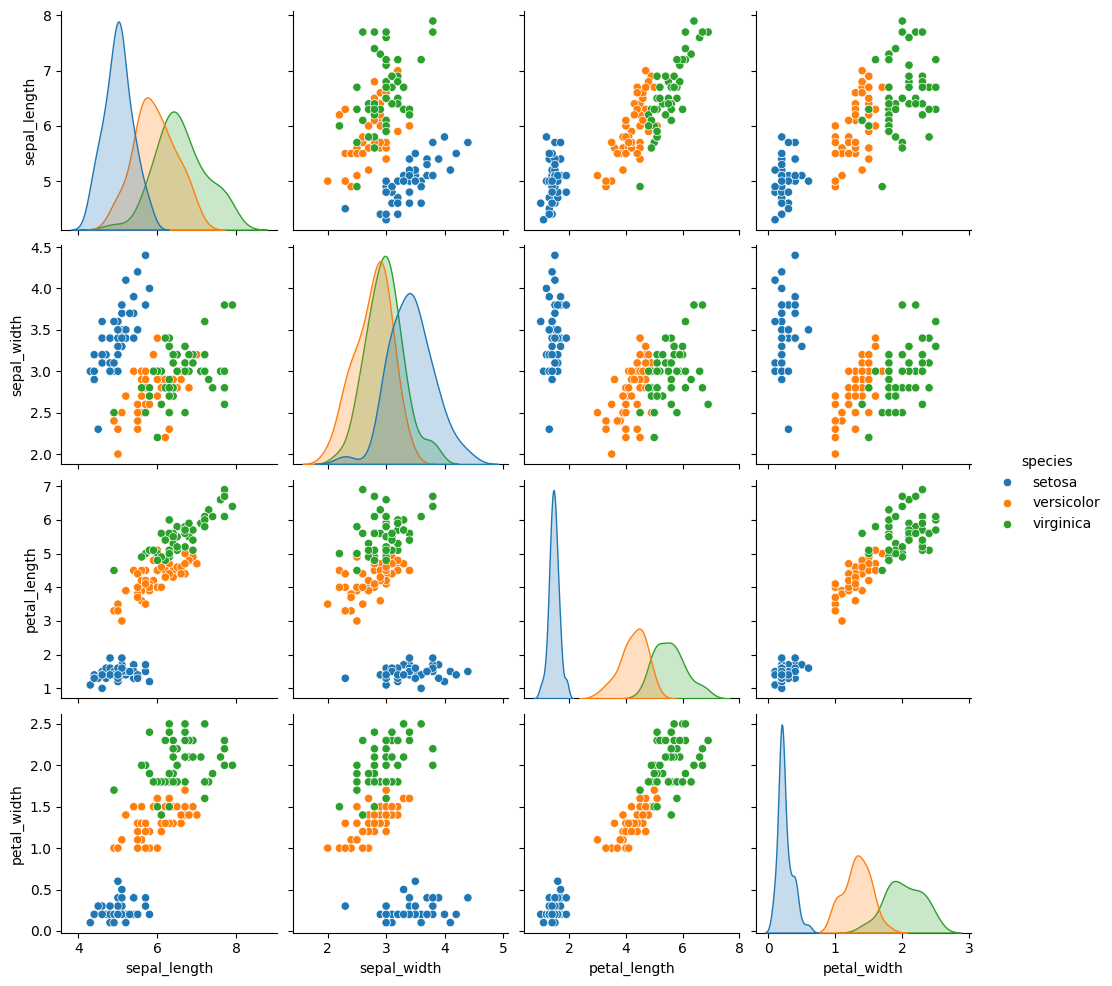

In [110]:
seaborn_df = sns.load_dataset("iris")
sns.pairplot(seaborn_df, hue="species")

Let's recreate one of these for our future analysis. Let's look at ploting a scatterplot comparing `sepal_length` and `petal_length` for each of the three species.

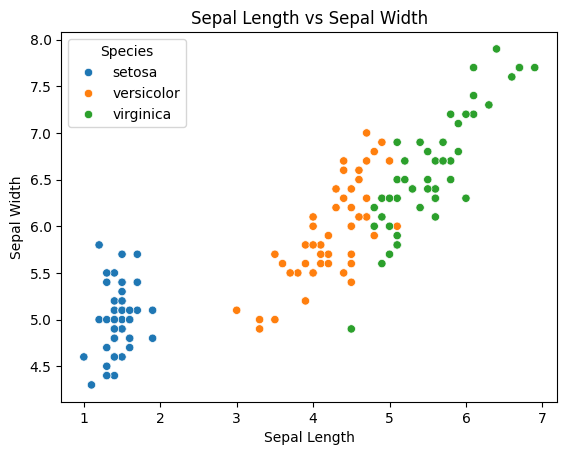

In [111]:
plt.figure()
sns.scatterplot(data=seaborn_df, x="petal_length", y="sepal_length", hue="species")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Species')
plt.show()

This looks appropriate and matches what we see in the pairplot generated by seaborn

### b) sorting

TODO: Drew

### c) Data Normalization

In [112]:
def normalize_min_max(df, a=0, b=1):
    # df: df.DataFrame -> dataset

    min_xk = np.min(df.values, axis=0)
    max_xk = np.max(df.values, axis=0)

    # Min-max normalization
    xhat = (df.values - min_xk) / (max_xk - min_xk) * (b-a) + a

    normalized_df = pd.DataFrame(data=xhat, columns=df.columns)
    return normalized_df

Remove the `species` column to do the normalization then add it back later

In [113]:
removed_species = iris_df.pop("species")
norm_iris = normalize_min_max(iris_df)

Add the species column back to the original dataframe

In [114]:
iris_df["species"] = removed_species

Let's double check to make sure that the minimum and maximum match our desired normalization

In [115]:
np.min(norm_iris.values)

np.float64(0.0)

In [116]:
np.max(norm_iris)

np.float64(1.0)

In [117]:

#norm_iris["species"] = removed_species

#### d) Outlier Removal

In [120]:
#import std_dev_ellipse_plots
from std_dev_ellipse_plots import sigma_ellipse_plot

/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_X = self.mean[0]
/home/drew/repos/algorithmsForDataScience/hw/prg1/std_dev_ellipse_plots.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_Y = self.mean[1]


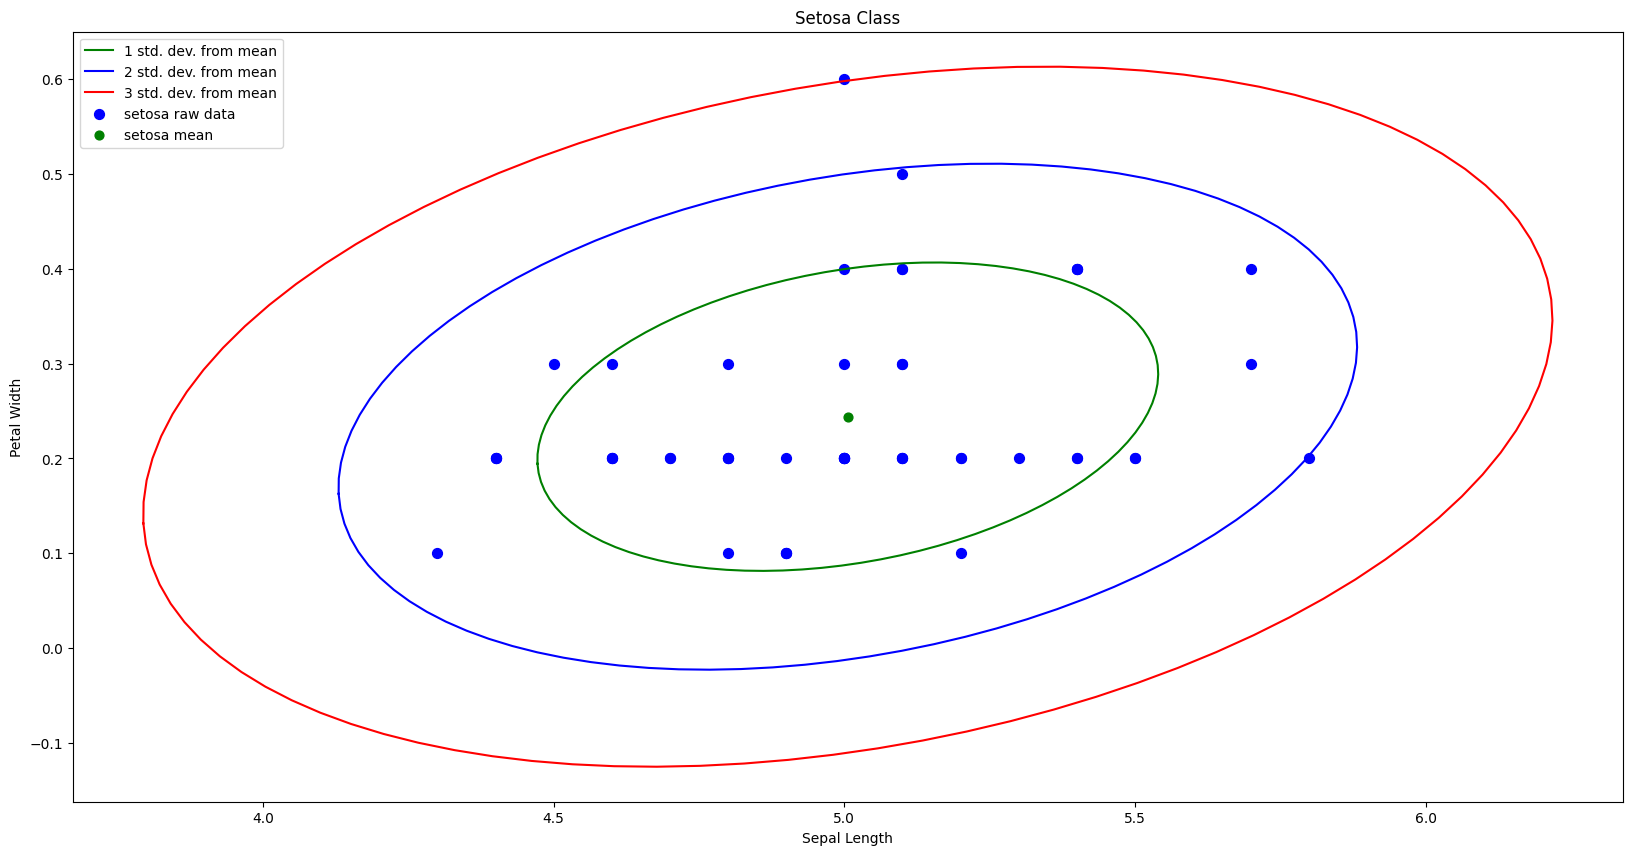

In [124]:

#df = pd.read_csv('iris.csv')
feature1 = 'sepal_length'
feature2 = 'petal_width'

setosa_ellipses_obj = sigma_ellipse_plot(df=iris_df, target='setosa', feature1=feature1, feature2=feature2)
setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
setosa_plot_labels = setosa_ellipses_obj.get_labels()

plt.figure(figsize=(20,10))

colors_for_plot = ['g', 'b', 'r']
for i in range(0, len(setosa_ellipses)):
    plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot[i], label= setosa_plot_labels[i])

plt.scatter(setosa_df[feature1], setosa_df[feature2], c='blue', s=50, label='setosa raw data')

###############
#plt.plot(setosa_df[feature1][outlier_index], setosa_df[feature2][outlier_index], marker='o', color='r', markersize=12, fillstyle='none', label='setosa_outlier')
###############

plt.scatter(setosa_mu_X, setosa_mu_Y, c='green', s=40, label = 'setosa mean')

plt.xlabel('Sepal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)
plt.title('Setosa Class')
plt.legend()

plt.show()